In [3]:
import os
print(os.listdir("C:/Users/Gagana/Desktop/DESKTOP SOFTWARES/6th sem/dataset"))

['Gmodel.h5', 'test', 'train']


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:/Users/Gagana/Desktop/DESKTOP SOFTWARES/6th sem/dataset/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('C:/Users/Gagana/Desktop/DESKTOP SOFTWARES/6th sem/dataset/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [13]:
batch_size=32
model_info=classifier.fit_generator(training_set,
steps_per_epoch = 100/batch_size,
epochs = 40,
validation_data = test_set,
validation_steps = 40/batch_size)

Epoch 1/40
4/3 [======================================] - 15s 4s/step - loss: 0.2869 - accuracy: 0.8828 - val_loss: 0.2684 - val_accuracy: 0.8594
Epoch 2/40
4/3 [======================================] - 10s 3s/step - loss: 0.2117 - accuracy: 0.9320 - val_loss: 0.3730 - val_accuracy: 0.8438
Epoch 3/40
4/3 [======================================] - 12s 3s/step - loss: 0.2897 - accuracy: 0.8984 - val_loss: 0.3345 - val_accuracy: 0.8594
Epoch 4/40
4/3 [======================================] - 12s 3s/step - loss: 0.3939 - accuracy: 0.7891 - val_loss: 0.2731 - val_accuracy: 0.8594
Epoch 5/40
4/3 [======================================] - 12s 3s/step - loss: 0.3845 - accuracy: 0.8438 - val_loss: 0.2825 - val_accuracy: 0.8594
Epoch 6/40
4/3 [======================================] - 12s 3s/step - loss: 0.3170 - accuracy: 0.8516 - val_loss: 0.2783 - val_accuracy: 0.8750
Epoch 7/40
4/3 [======================================] - 10s 2s/step - loss: 0.2881 - accuracy: 0.8932 - val_loss: 0.2168 -

In [14]:
### Performance evaluation
#########################
score = classifier.evaluate_generator(test_set, 64/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])
#print("Accuracy = ",score[1])

 Total:  64
Loss:  0.16516612470149994 Accuracy:  0.921875


In [15]:
model_info.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

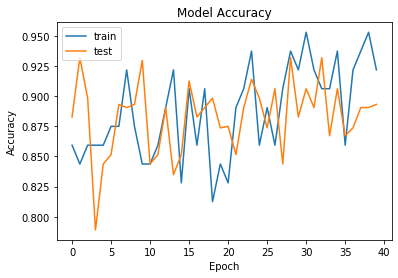

In [16]:
import matplotlib.pyplot as plt

plt.plot(model_info.history['val_accuracy'])
plt.plot(model_info.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

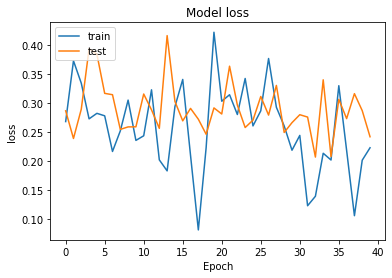

In [17]:
import matplotlib.pyplot as plt

plt.plot(model_info.history['val_loss'])
plt.plot(model_info.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [18]:
classifier.save('C:/Users/Gagana/Desktop/DESKTOP SOFTWARES/6th sem/dataset/Gmodel.h5')

In [19]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [20]:
target_size = (256,256)
model=load_model('C:/Users/Gagana/Desktop/DESKTOP SOFTWARES/6th sem/dataset/Gmodel.h5')
print("model loaded")

model loaded


In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:/Users/Gagana/Desktop/DESKTOP SOFTWARES/6th sem/dataset/test/class0/Im199.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

Not Glaucoma
